# Exploring each Group to Look at ways to Analyze
## DRAFT WORK ##

## now only erroring on original 3 .txt noted by Ian Gorton in original commnication



# TO DO

# broken down by conferences and years...  (enter a keyword and see trend over conference and year.
- Search by Conf and Year DONE
- - see visual breakdown DONE
- - link to the link to the papers/title/abstract DONE
- - link to the top 10 keywords and papers (see a pie chart) DONE

## top keywords(cts?) for given conference over the years.
- - NEED TO DO : choose top 10 and see over time for a conference?

## compare the confernces - given two conferences display their top keywords for a given year
- - can do it but not at the same time



# Keywords
-  search for a keyword
- - see its trends (heatmap of conf/year/count)
- - see counts per conf/year
- - see what papers it is part of
- from conf/year link to the papers/title/abstract

# Authors
## do same for authors and what conferences.

## top 20 authors and their keywords, conferences, trends over time.
 

In [1]:
import sqlite3
import pandas as pd
mydb = 'Abstracts_DB.db'

In [2]:
import sqlcommands as cmd
cmd = reload(cmd)

(1548, 7)
(1548, 7)


# Functions to test visualizations (in ../Flask/app/images.py)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cStringIO import StringIO
import base64
import seaborn as sns
%matplotlib inline

def getPieOne(df, conference):
    fig = plt.figure()
    fig = df.plot(kind = 'pie', 
                  colormap = 'Blues', 
                  title = conference, 
                  subplots = True, 
                  legend = False, 
                  labels = ['' for x in np.arange(len(df))])
    plt.ylabel('')
    plt.legend( list(df.index), 
               bbox_to_anchor=(1.1, 1),
              fontsize = "xx-small")
    
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    
    return fig
    #plt.close()
    #return script.format(data)


def getBar(df, conference, xaxis, yaxis, orientation, ylabel = 'count', xlabel = 'trada'):
    plt.cla()
    fig = sns.barplot(data = df, 
                      y =  yaxis,#'keyword', 
                      x = xaxis, #'count', 
                      palette='Blues', 
                      orient = orientation)
    fig.set_ylabel(ylabel)
    fig.set_xlabel(xlabel)
    
    #for l in fig.get_ymajorticklabels():
        #l.set_visible(False)
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #plt.close()
    #return script.format(data)


def getHeatMap(data_frame, indexCol = 'confName', cols = 'pubYear', vals = 'counts'):
    #plt.cla()
    
    fig = sns.heatmap(data_frame.pivot_table(index=indexCol, 
                                             columns=cols, 
                                             values=vals),
                                             cmap = 'Blues')
    
    
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #plt.close()
    #return script.format(data)

def getLine(data_frame, xaxis = 'confName', yaxis = 'counts'):
    #plt.cla()
    fig = sns.swarmplot(data = data_frame, 
                        x=xaxis, 
                        y = yaxis,
                        palette = 'Blues')
    
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #return script.format(data)

# Conference and Publications
- DONE
- - Search by Conference and Year
- - See visual breakdown by Conf and Year
- - Links to what were the top 10 keywords (and their papers)
- - Links to the Papers and their keywords for that Pub/Conf breakdown


In [4]:
def getContentsconf():
    with sqlite3.connect(mydb) as con:
        sqlcmd = "SELECT Conf, Year FROM ABSTRACTSTOTAL"
        df = pd.read_sql_query(sqlcmd, con)
        myt = []
    
        
        conferences = list(df['Conf'].unique())
    
   
        for conf in conferences:
        
            entry = {}
            entry['conf'] = conf
        
            subDF = df.query('Conf == "%s"' % conf).groupby('year').count()
            entry['counts'] = subDF.to_html()
            
            image = getPieOne(subDF, conf)
            entry['Pie']  = image
            
            subDF.reset_index(inplace = True)
            image2 = getBar(subDF, 
                            conf, 
                            xaxis = 'year', yaxis = 'Conf', 
                            orientation = "v"
                            )
            entry['Bar'] = image2
        
            myt.append(entry)
    
    return dict(data = myt), df

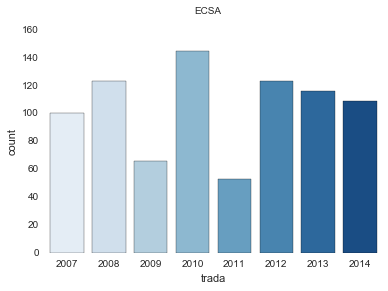

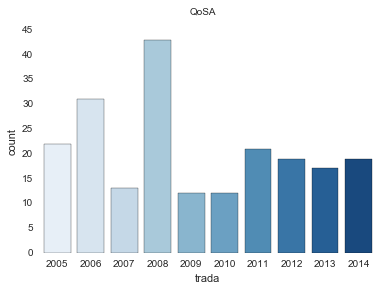

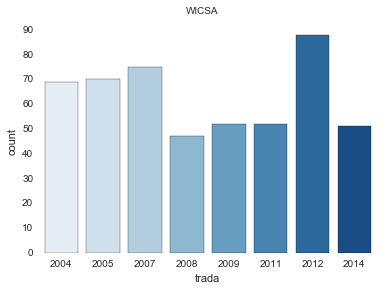

In [5]:
g, df = getContentsconf()

# Trying HeatMap

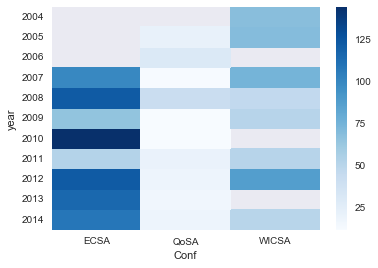

In [6]:
df = df.groupby(['Conf', 'year'])['Conf'].count().reset_index(name="counts")
y = sns.heatmap(df.pivot_table(index='year', columns='Conf', values='counts'),
                                             cmap = 'Blues')


# Papers and Their Keywords
- search by Keyword - get paperIds, conf, years, link to HEATMAP of count over the years/conferences



In [7]:
def getPapersKWgroup(grouper):
    
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT paperID, title, confName, pubYear FROM PAPER "
        
        paperdf = pd.read_sql_query(sqlcmd, con)
        
        sqlcmd2 = "SELECT paperID, keyword FROM PAPERKEY "
        kwdf = pd.read_sql_query(sqlcmd2, con)
        kwdf['keyword'] = kwdf['keyword'].apply(lambda word: eval(word))
        
        merged = kwdf.merge(paperdf, on = 'paperID')
        
        subgrp = merged.groupby(grouper)
        
        return merged, subgrp



def confYrKeywords(top = 10):
    grouper = ['confName', 'pubYear']
    m, f = getPapersKWgroup(grouper)
    myentries = []
    for group in f.groups.keys():
        #print group
        keywordcts = f.get_group((group)).groupby(["keyword"])["keyword"].count()
        
        kwdftop = keywordcts.sort_values(ascending = False).head(top)
        
        resetKW = pd.DataFrame(kwdftop).rename(columns = {'keyword' : 'count'})
        entry = {}
        entry['Group'] = group
        
        entry['Pie'] = getPieOne(resetKW, group)
        entry['Counts'] = resetKW.to_html()
        
        myentries.append(entry)
    
    return dict(data = myentries)

def getKWTRends(kw, grouper):
    
    m, f = getPapersKWgroup(grouper)
    
    query2 = '"%s" == keyword' %kw
    
    data_frame = m.copy()
    data_frame.query(query2, inplace = True)
    new = data_frame.copy()
    
    def findKWTrend(df, KWgrouper = ["pubYear", "confName"]):

        df = df.groupby(KWgrouper)['keyword'].count().reset_index(name="counts")
        
        try:
            return getHeatMap(df)
        except:
            return 'no data'
        
    
    image = findKWTrend(new)
    
    myentry = [{'table' : data_frame.to_html(),
              'trend'  : image
               }]
    
    return dict(data = myentry)

def seeKWTop20(top = 20):
    m, f = getPapersKWgroup('keyword')
    
    topWds = f.count().sort_values(by = 'confName', ascending = False)[:top]
    
    mTop20 = m[m['keyword'].isin(topWds.index)]
    
    mTop20['counts'] = mTop20.groupby(['confName', 'pubYear', 'keyword'])['keyword'].transform('count')
    
    image = getHeatMap(mTop20, indexCol='keyword', cols = ['confName', 'pubYear'], vals = 'counts')
    
    topWds.reset_index(inplace = True)
    topWds.rename(columns = {'confName' : 'OverallCount'}, inplace = True)
    cts = topWds[['keyword', 'OverallCount']]
    
    
    
    return dict(data = 
                        {'Top20' : cts,
                       'HeatMap' : image})
                    

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'data': {'HeatMap': <matplotlib.axes._subplots.AxesSubplot at 0x11ee74ed0>,
  'Top20':                            keyword  OverallCount
  0             Computer Programming           708
  1   Data Handling and Applications           515
  2                Computer Software           515
  3            Computer Applications           414
  4             Buildings and Towers           285
  5            Software architecture           270
  6  Software engineering techniques           230
  7                     Architecture           217
  8            software architecture           215
  9                Computer software           185}}

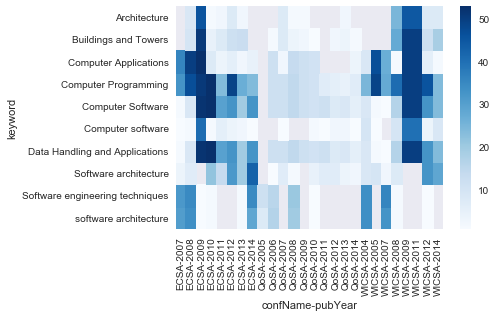

In [10]:
h = seeKWTop20(top = 10)
h

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


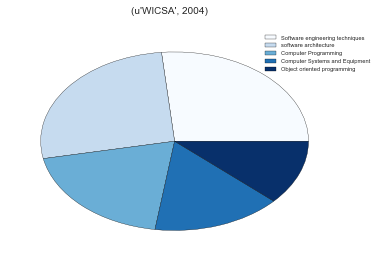

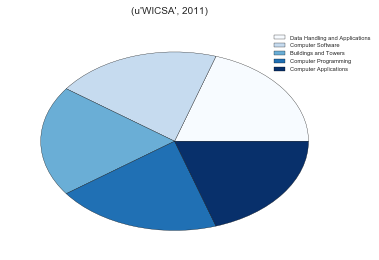

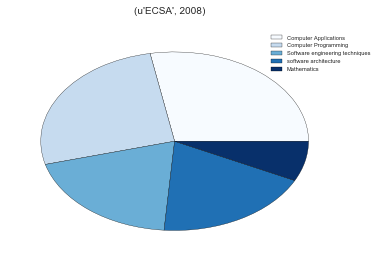

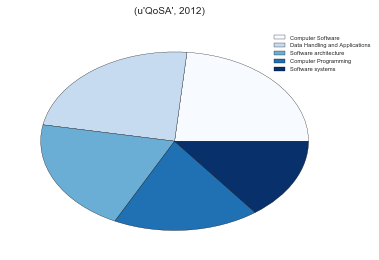

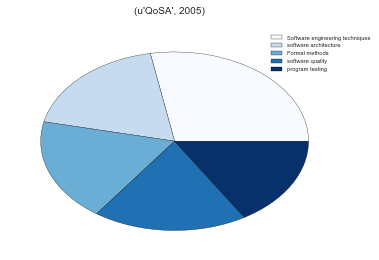

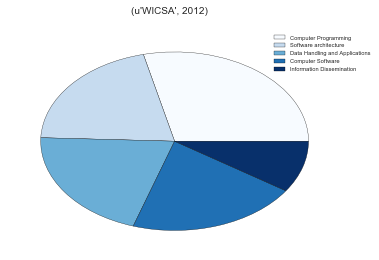

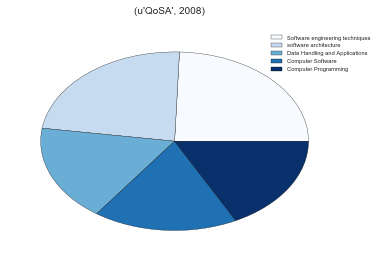

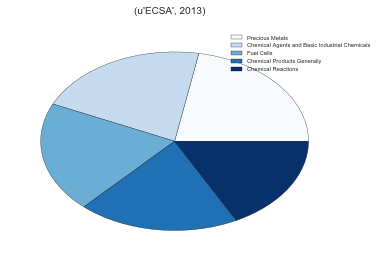

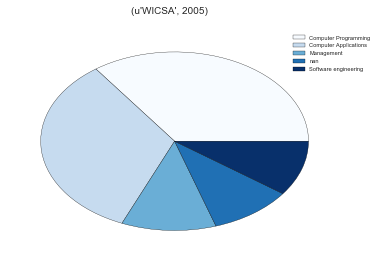

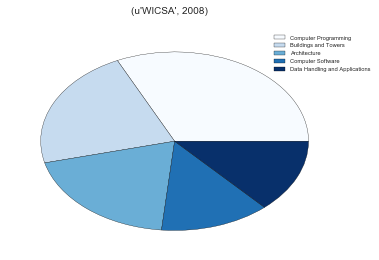

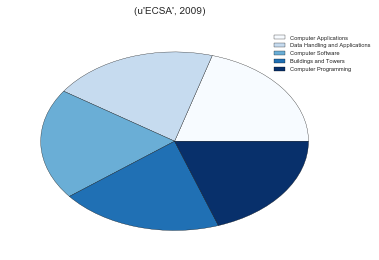

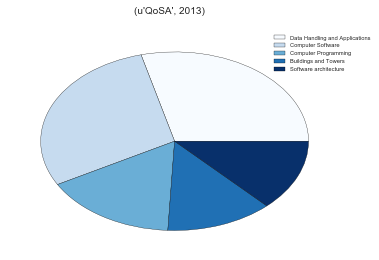

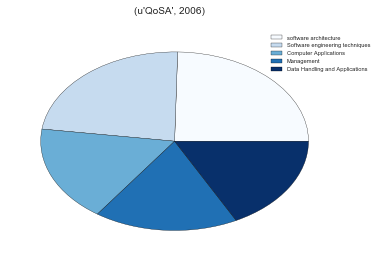

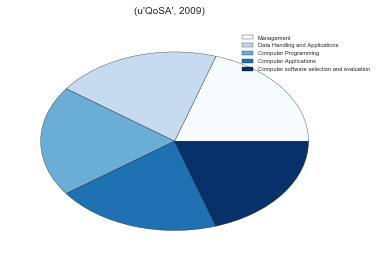

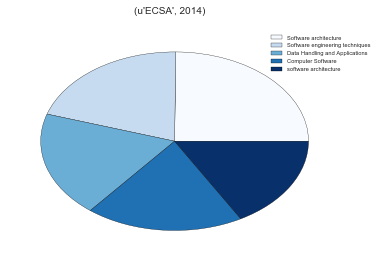

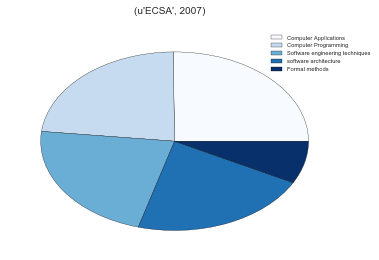

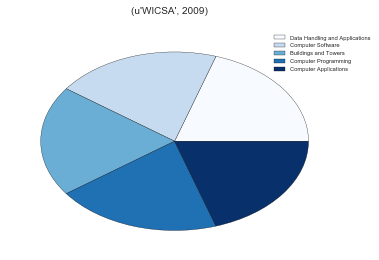

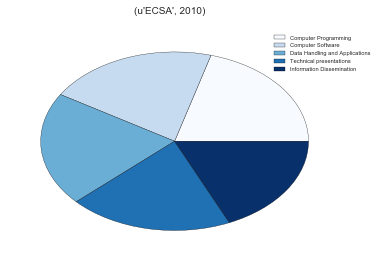

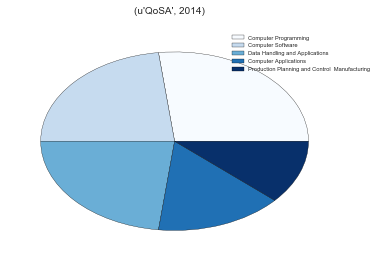

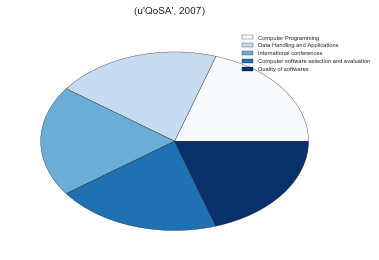

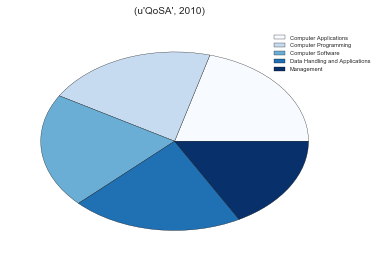

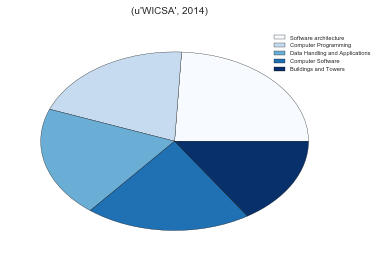

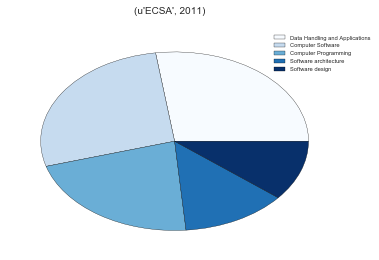

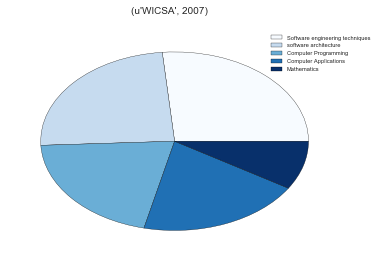

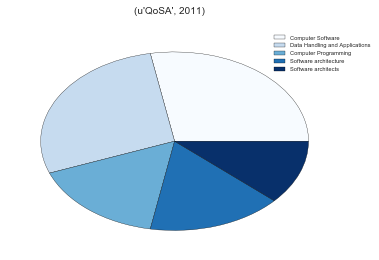

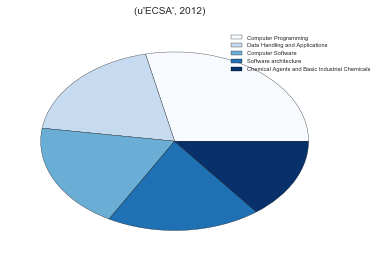

In [11]:
tryit = confYrKeywords(top = 5)

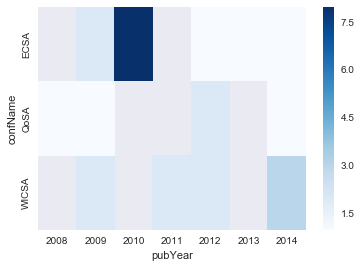

In [12]:
t = getKWTRends('Research', 'keyword')

In [ ]:
topWds = f.count().sort_values(by = 'confName', ascending = False)[:20]

topWds.reset_index(inplace = True)

In [ ]:
f = getKWTOP()

In [ ]:
mTop20['counts'] = mTop20.groupby(['confName', 'pubYear', 'keyword'])['keyword'].transform('count')

In [ ]:
getHeatMap(mTop20, indexCol='keyword', cols = ['confName', 'pubYear'], vals = 'counts')

In [ ]:
m , p = getKWTrend('hi')

def getTOPOVERALL():
    m,p = getPapersKWgroup('keyword')
    
    m['counts'] = m.groupby(['keyword'])['keyword'].transform('count')

    m.head()
    m.drop_duplicates('keyword', inplace = True)
    m.sort_values(by = 'counts', inplace=True, ascending = False)
keywords = m.keyword[:20]
print keywords
m.head()
#m2 = m.copy()
#m2 = m2.groupby(['confName', 'pubYear'])
#m2.groups

In [246]:
def getAuthors(grouper):
    
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT * FROM AUTHORS"
        
        audf = pd.read_sql_query(sqlcmd, con)
        
        sqlcmd2 = "SELECT paperID, authors FROM PAPER"
        papdf = pd.read_sql_query(sqlcmd2, con)
        
        return audf, papdf

In [250]:
au, pap= getAuthors('hi')
name = au.iloc[0].authorName
name.strip()

u'Kolb  Ronny'

In [141]:
pap.head()

paperID                                            authors
0        1  ['Lopez Herrejon, Roberto E', '', '', ' Egyed,...
1        2  ['Perovich, Daniel', '', '', 'Rossel, Pedro O'...
2        3  ['Perovich, Daniel', '', '', 'Rossel, Pedro O'...
3        4  ['Perovich, Daniel', '', '', 'Rossel, Pedro O'...
4        5  ['Wang, Rongfang', ' ,', '', ' Wang, Hui', ' ,...

In [147]:
import re
commaQuote = re.compile('[\'],')
    

pap['NEWAUTHORS'] = pap["authors"].apply(lambda a: a.strip("[]'"))

test = pap.iloc[500].NEWAUTHORS

In [150]:
pap['NEWAUTHORS2'] = pap["NEWAUTHORS"].apply(lambda a: rech(a))

In [149]:
def rech(names):
    names2 = []
    for a in names.split("'"):
        if a.strip() == "," :
            pass
        elif a.strip() == '':
            pass
        else:
            names2.append(a)
    return names2

In [158]:
pap.head()

paperID                                            authors  \
0        1  ['Lopez Herrejon, Roberto E', '', '', ' Egyed,...   
1        2  ['Perovich, Daniel', '', '', 'Rossel, Pedro O'...   
2        3  ['Perovich, Daniel', '', '', 'Rossel, Pedro O'...   
3        4  ['Perovich, Daniel', '', '', 'Rossel, Pedro O'...   
4        5  ['Wang, Rongfang', ' ,', '', ' Wang, Hui', ' ,...   

                                          NEWAUTHORS  \
0  Lopez Herrejon, Roberto E', '', '', ' Egyed, A...   
1  Perovich, Daniel', '', '', 'Rossel, Pedro O', ...   
2  Perovich, Daniel', '', '', 'Rossel, Pedro O', ...   
3  Perovich, Daniel', '', '', 'Rossel, Pedro O', ...   
4  Wang, Rongfang', ' ,', '', ' Wang, Hui', ' ,',...   

                                         NEWAUTHORS2  
0     [Lopez Herrejon, Roberto E,  Egyed, Alexander]  
1  [Perovich, Daniel, Rossel, Pedro O,  Bastarric...  
2  [Perovich, Daniel, Rossel, Pedro O,  Bastarric...  
3  [Perovich, Daniel, Rossel, Pedro O,  Bastarric...  
4  [Wang, Rongfang,  Wang, Hui,  Wei, Bangxing,  ...

In [163]:
np.array([1]*len(pap.iloc[3].NEWAUTHORS2))

array([1, 1, 1])

In [177]:
entries=[]
i = 0
for each in pap.index:
    paperID = pap.iloc[each].paperID
    authors = pap.iloc[each].NEWAUTHORS2
    index = np.array([paperID]*len(authors))
    listau = zip(index, authors)
    
    entries.extend(listau)

In [251]:
y = pd.DataFrame(entries)
y.rename(columns = {0:'paperID', 1:'authorName'}, inplace = True)
y.authorName = y.authorName.apply(lambda au: au.replace(",",' '))

In [252]:
len(y.authorName.unique())

2958

In [263]:
name = au.iloc[0].authorName
print name

new = y.iloc[0].authorName
print new

Kolb  Ronny
Lopez Herrejon  Roberto E


In [255]:
x = y.query('paperID == 1')

In [256]:
x

paperID                 authorName
0        1  Lopez Herrejon  Roberto E
1        1           Egyed  Alexander

In [266]:
z = y.query('"Lopez Herrejon  Roberto E" == authorName')

In [267]:
z

paperID                 authorName
0        1  Lopez Herrejon  Roberto E

In [268]:
y.merge(au, on = 'authorName')

paperID                   authorName  authorID
0           1    Lopez Herrejon  Roberto E       556
1           2             Perovich  Daniel      1155
2           3             Perovich  Daniel      1155
3           4             Perovich  Daniel      1155
4         128             Perovich  Daniel      1155
5           2              Rossel  Pedro O      2385
6           3              Rossel  Pedro O      2385
7           4              Rossel  Pedro O      2385
8           5               Wang  Rongfang      1459
9           6               Hilliard  Rich       168
10          7               Hilliard  Rich       168
11         49               Hilliard  Rich       168
12        488               Hilliard  Rich       168
13        489               Hilliard  Rich       168
14       1066               Hilliard  Rich       168
15       1070               Hilliard  Rich       168
16       1071               Hilliard  Rich       168
17       1072               Hilliard  Rich       168
18       1191               Hilliard  Rich       168
19       1312               Hilliard  Rich       168
20       1313               Hilliard  Rich       168
21       1314               Hilliard  Rich       168
22          6             Malavolta  Ivano       805
23          7             Malavolta  Ivano       805
24         48             Malavolta  Ivano       805
25        164             Malavolta  Ivano       805
26        444             Malavolta  Ivano       805
27          6               Muccini  Henry      2761
28          7               Muccini  Henry      2761
29         48               Muccini  Henry      2761
...       ...                          ...       ...
3758     1460               Navasa  Amparo      2029
3759     1459              P rez  Miguel A      2562
3760     1460              P rez  Miguel A      2562
3761     1461                    Navasa  A      1518
3762     1462                    Navasa  A      1518
3763     1465                      Land  R      1501
3764     1466              Biehl  Matthias      1108
3765     1467                Hosking  John      1435
3766     1468                Hosking  John      1435
3767     1469          De Sanctis  Martina        57
3768     1470          De Sanctis  Martina        57
3769     1471          Aboud  Nour Alhouda      2495
3770     1472          Aboud  Nour Alhouda      2495
3771     1473          Aboud  Nour Alhouda      2495
3772     1471            Ar valo  Gabriela       864
3773     1472            Ar valo  Gabriela       864
3774     1473            Ar valo  Gabriela       864
3775     1471           Falleri  Jean R my      1418
3776     1472           Falleri  Jean R my      1418
3777     1473           Falleri  Jean R my      1418
3778     1475          De Gooijer  Thijmen      2313
3779     1478                Gassara  Amal      2311
3780     1478  Bouassida Rodriguez  Ismael      2527
3781     1479        Bardram  Jakob Eyvind       336
3782     1481               Chang  Zhiming      1863
3783     1481                  Mao  Xinjun      1287
3784     1481                 Qi  Zhichang      1669
3785     1482                Ahmad  Aakash      1797
3786     1485               Coelho  Wesley      2051
3787     1486                    Xie  Jian       417

[3788 rows x 3 columns]